In [1045]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [1046]:
tf.reset_default_graph()
defined = pd.read_csv('TSE(original).csv',usecols=[1,4]) #[0,1]
inputs = pd.read_csv('TSE(original).csv',usecols=[4,13])
print (defined[:10])
defined=defined.values
print(inputs)
inputs=inputs.values

      Open    Close
0  7504.45  7468.22
1  7440.56  7361.94
2  7379.48  7391.15
3  7372.06  7371.44
4  7363.25  7397.06
5  7430.40  7450.53
6  7471.31  7451.35
7  7429.93  7367.44
8  7383.04  7326.72
9  7434.43  7424.91
         Close   MACD9
0      7468.22   72.38
1      7361.94   70.99
2      7391.15   68.12
3      7371.44   64.14
4      7397.06   59.74
5      7450.53   55.93
6      7451.35   52.84
7      7367.44   49.07
8      7326.72   44.28
9      7424.91   40.38
10     7482.74   37.87
11     7485.13   36.52
12     7570.45   37.02
13     7578.80   38.88
14     7738.05   43.66
15     7762.22   50.54
16     7734.26   57.91
17     7781.91   65.59
18     7727.55   72.41
19     7754.59   78.42
20     7768.30   83.50
21     7734.13   87.35
22     7669.63   88.90
23     7683.80   88.84
24     7715.16   87.94
25     7675.72   85.96
26     7718.68   83.73
27     7684.63   80.99
28     7682.34   77.49
29     7690.65   73.92
...        ...     ...
1311  10488.97  -57.31
1312  10537.27  -55.5

In [1047]:
inputs=np.array(inputs)
print(inputs.shape, inputs)
print(defined)
print(defined[1][0])

(1341, 2) [[  7468.22     72.38]
 [  7361.94     70.99]
 [  7391.15     68.12]
 ..., 
 [ 11076.78    131.78]
 [ 11103.79    130.53]
 [ 11160.25    128.85]]
[[  7504.45   7468.22]
 [  7440.56   7361.94]
 [  7379.48   7391.15]
 ..., 
 [ 11189.57  11076.78]
 [ 11054.36  11103.79]
 [ 11139.4   11160.25]]
7440.56


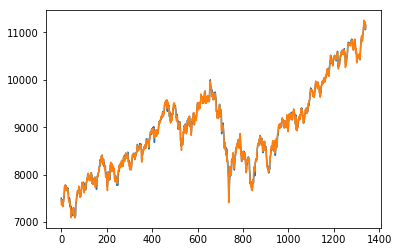

In [1048]:
%matplotlib inline
plt.plot(defined)
plt.show()

In [1049]:
def create_dataset(dataset, look_back=1,col=1):

    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back+1):
            dataX.append(dataset[i:(i+look_back),:])
            dataY.append(dataset[i+look_back-1,:])

    return np.array(dataX), np.array(dataY)

### Train and Test sets

In [1050]:
#data normalization
scaler = MinMaxScaler(feature_range=(0,1))
defined= scaler.fit_transform(defined)
inputs= scaler.fit_transform(inputs)
look_back=5
col=2

train_size= int(len(defined)*0.8)
test_size= len(defined)-train_size

data, o= create_dataset(inputs,look_back,2)
x_train,x_test= data[0:train_size,:],data[train_size:len(data),:]
print(x_train.shape,x_test[0:5])

(1072, 5, 2) [[[ 0.52451124  0.64477167]
  [ 0.5278921   0.64526803]
  [ 0.5449837   0.65008982]
  [ 0.54836456  0.65848067]
  [ 0.54120904  0.66807696]]

 [[ 0.5278921   0.64526803]
  [ 0.5449837   0.65008982]
  [ 0.54836456  0.65848067]
  [ 0.54120904  0.66807696]
  [ 0.54294269  0.67741326]]

 [[ 0.5449837   0.65008982]
  [ 0.54836456  0.65848067]
  [ 0.54120904  0.66807696]
  [ 0.54294269  0.67741326]
  [ 0.54200623  0.68639501]]

 [[ 0.54836456  0.65848067]
  [ 0.54120904  0.66807696]
  [ 0.54294269  0.67741326]
  [ 0.54200623  0.68639501]
  [ 0.55747943  0.69644039]]

 [[ 0.54120904  0.66807696]
  [ 0.54294269  0.67741326]
  [ 0.54200623  0.68639501]
  [ 0.55747943  0.69644039]
  [ 0.54995174  0.70544578]]]


In [1051]:
## define [0,1][1,0]
def create_updown(dataset):
    dataY=[]
    for i in range (len(dataset)):
        if(i+1)<len(dataset):
            #print(dataset[i+1][0], dataset[i][1])
            a= dataset[i+1][0]-dataset[i][1]
            #print(a)
            if np.any(a>0):
                dataY.append([0,1])
            else:
                dataY.append([1,0])
                
    dataY.append([1,0])
    return np.array(dataY,dtype='float32')

In [1052]:
print (defined)

[[ 0.09393727  0.09117999]
 [ 0.07845513  0.06566025]
 [ 0.06365392  0.0726741 ]
 ..., 
 [ 0.98693384  0.95766   ]
 [ 0.95416908  0.96414559]
 [ 0.97477639  0.97770265]]


In [1053]:
y_data=create_updown(defined)
#y, y_data= create_dataset(defined,look_back,1)
y_train, y_test= y_data[look_back-1:train_size+4,:],y_data[train_size+4:len(defined),:]
#y_train, y_test= y_data[0:train_size,:],y_data[train_size:len(defined),:]

print(defined, y_data[0:5],y_train.shape, y_test.shape)



[[ 0.09393727  0.09117999]
 [ 0.07845513  0.06566025]
 [ 0.06365392  0.0726741 ]
 ..., 
 [ 0.98693384  0.95766   ]
 [ 0.95416908  0.96414559]
 [ 0.97477639  0.97770265]] [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]] (1072, 2) (265, 2)


In [1054]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1072, 5, 2) (1072, 2) (265, 5, 2) (265, 2)


In [1055]:
#x_train=np.reshape(1072,15)
x_train=np.reshape(x_train, (-1, look_back*col))
x_test=np.reshape(x_test,(-1, look_back*col))
print(x_train.shape, x_test.shape)

(1072, 10) (265, 10)


In [1056]:
# Initializers
#sigma = 1
#weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
#bias_initializer = tf.zeros_initializer()

In [1057]:
def layer(output_dim,input_dim,inputs,activation):
    w=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    xwb=tf.matmul(inputs,w)+b
    if activation is None:
        outputs=xwb
    else:
        outputs=activation(xwb)
    return outputs

In [1058]:
x=tf.placeholder("float",[None,look_back*col])
h1=layer(output_dim=80, input_dim=look_back*col, inputs=x, activation=tf.nn.relu)
h2=layer(output_dim=10, input_dim=80, inputs=h1,activation=tf.nn.relu)
y_predict=layer(output_dim=2, input_dim=10, inputs=h2, activation=None)
x.shape

TensorShape([Dimension(None), Dimension(10)])

In [1059]:
y_label=tf.placeholder("float",[None,2])
loss_fun=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_fun)


In [1060]:
correct_predict=tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))
accuracy= tf.reduce_mean(tf.cast(correct_predict,"float"))

In [1061]:
trainEpochs=500
batchsize=100
loss_train=[];epoch_list=[];accuracy_train=[]
loss_test=[]; accuracy_test=[]
totalbatchs= int(len(data)//batchsize)
from time import time
startTime=time()

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [1062]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1063]:

for epoch in range(trainEpochs):
    shuffle = np.random.permutation(len(y_train)-1)
    x_train = x_train[shuffle]
    y_train = y_train[shuffle]
    for i in range(totalbatchs):
        sess.run(optimizer,feed_dict={x:x_train,y_label:y_train})
        
    
    loss_tra,acc_tra= sess.run([loss_fun, accuracy],feed_dict={x:x_train,y_label:y_train})
    loss_t,acc_t= sess.run([loss_fun, accuracy],feed_dict={x:x_test,y_label:y_test})
    

    epoch_list.append(epoch);
    loss_test.append(loss_t)
    loss_train.append(loss_tra)
    accuracy_test.append(acc_t)
    accuracy_train.append(acc_tra)
    
    #print ("Train Epoch:",'%02d'%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)

duration=time()-startTime

print("Loss_train= ",loss_tra)
print ("Loss_test= ",loss_t)

print("Accuracy_train= ", acc_tra)
print("Accuracy_test= ", acc_t)

print("Train Finished takes:",duration)

Loss_train=  0.645583
Loss_test=  0.702834
Accuracy_train=  0.648601
Accuracy_test=  0.573585
Train Finished takes: 11.669600009918213


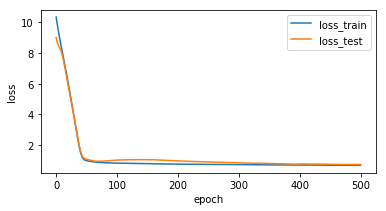

In [1064]:

fig=plt.gcf()
fig.set_size_inches(6,3)
plt.plot(epoch_list,loss_train, label='loss_train')
plt.plot(epoch_list,loss_test, label='loss_test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

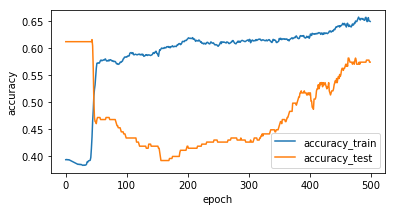

In [1065]:

fig=plt.gcf()
fig.set_size_inches(6,3)
plt.plot(epoch_list,accuracy_train, label='accuracy_train')
plt.plot(epoch_list,accuracy_test, label='accuracy_test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()